## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")

Using TensorFlow backend.


In [2]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,969,930
Trainable params: 1,969,930
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.4320 - accuracy: 0.2404 - val_loss: 1.8916 - val_accuracy: 0.3081
Epoch 2/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.7749 - accuracy: 0.3584 - val_loss: 1.6967 - val_accuracy: 0.3891
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6834 - accuracy: 0.3918 - val_loss: 1.6315 - val_accuracy: 0.4101
Epoch 4/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6206 - accuracy: 0.4148 - val_loss: 1.6097 - val_accuracy: 0.4270
Epoch 5/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5947 - accuracy: 0.4258 - val_loss: 1.5753 - val_accuracy: 0.4390
Epoch 6/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5521 - accuracy: 0.4393 - val_loss: 1.5713 - val_accuracy: 0.4337
Epoch 7/500
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 45us/step - loss: 1.2222 - accuracy: 0.5606 - val_loss: 1.5889 - val_accuracy: 0.4723
Epoch 55/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2302 - accuracy: 0.5567 - val_loss: 1.6300 - val_accuracy: 0.4686
Epoch 56/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2139 - accuracy: 0.5648 - val_loss: 1.5966 - val_accuracy: 0.4673
Epoch 57/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2170 - accuracy: 0.5613 - val_loss: 1.6063 - val_accuracy: 0.4578
Epoch 58/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2260 - accuracy: 0.5576 - val_loss: 1.5904 - val_accuracy: 0.4670
Epoch 59/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2068 - accuracy: 0.5647 - val_loss: 1.5962 - val_accuracy: 0.4746
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.2091 - accuracy: 0.5646 - val_loss: 

50000/50000 [==============================] - 2s 45us/step - loss: 1.1143 - accuracy: 0.6010 - val_loss: 1.7792 - val_accuracy: 0.4662
Epoch 110/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0966 - accuracy: 0.6036 - val_loss: 1.8358 - val_accuracy: 0.4700
Epoch 111/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0973 - accuracy: 0.6033 - val_loss: 1.8479 - val_accuracy: 0.4621
Epoch 112/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0977 - accuracy: 0.6061 - val_loss: 1.9315 - val_accuracy: 0.4463
Epoch 113/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1151 - accuracy: 0.5973 - val_loss: 1.7972 - val_accuracy: 0.4476
Epoch 114/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0970 - accuracy: 0.6057 - val_loss: 1.9134 - val_accuracy: 0.4611
Epoch 115/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0906 - accuracy: 0.6070 - val_

Epoch 164/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0588 - accuracy: 0.6179 - val_loss: 2.0265 - val_accuracy: 0.4295
Epoch 165/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0646 - accuracy: 0.6189 - val_loss: 2.0539 - val_accuracy: 0.4541
Epoch 166/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0569 - accuracy: 0.6188 - val_loss: 2.0448 - val_accuracy: 0.4586
Epoch 167/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0505 - accuracy: 0.6226 - val_loss: 1.9029 - val_accuracy: 0.4553
Epoch 168/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0425 - accuracy: 0.6222 - val_loss: 1.9519 - val_accuracy: 0.4603
Epoch 169/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0440 - accuracy: 0.6246 - val_loss: 1.9165 - val_accuracy: 0.4547
Epoch 170/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0389 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 1.0341 - accuracy: 0.6287 - val_loss: 2.1408 - val_accuracy: 0.4557
Epoch 219/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0032 - accuracy: 0.6419 - val_loss: 2.1999 - val_accuracy: 0.4397
Epoch 220/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0357 - accuracy: 0.6284 - val_loss: 2.1103 - val_accuracy: 0.4579
Epoch 221/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0154 - accuracy: 0.6323 - val_loss: 2.0904 - val_accuracy: 0.4557
Epoch 222/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0395 - accuracy: 0.6282 - val_loss: 2.1888 - val_accuracy: 0.4494
Epoch 223/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0357 - accuracy: 0.6279 - val_loss: 2.1660 - val_accuracy: 0.4600
Epoch 224/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0233 - accuracy: 0.6329 - val_

Epoch 273/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.9738 - accuracy: 0.6497 - val_loss: 2.3841 - val_accuracy: 0.4494
Epoch 274/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0040 - accuracy: 0.6406 - val_loss: 2.3832 - val_accuracy: 0.4427
Epoch 275/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9781 - accuracy: 0.6489 - val_loss: 2.2584 - val_accuracy: 0.4560
Epoch 276/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0033 - accuracy: 0.6409 - val_loss: 2.5133 - val_accuracy: 0.4475
Epoch 277/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9917 - accuracy: 0.6466 - val_loss: 2.4442 - val_accuracy: 0.4459
Epoch 278/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9956 - accuracy: 0.6426 - val_loss: 2.3480 - val_accuracy: 0.4402
Epoch 279/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9909 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 0.9736 - accuracy: 0.6512 - val_loss: 2.5700 - val_accuracy: 0.4456
Epoch 328/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9507 - accuracy: 0.6574 - val_loss: 2.6582 - val_accuracy: 0.4403
Epoch 329/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0252 - accuracy: 0.6361 - val_loss: 2.4561 - val_accuracy: 0.4476
Epoch 330/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9917 - accuracy: 0.6474 - val_loss: 2.4692 - val_accuracy: 0.4479
Epoch 331/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0036 - accuracy: 0.6415 - val_loss: 2.4989 - val_accuracy: 0.4397
Epoch 332/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9496 - accuracy: 0.6582 - val_loss: 2.5254 - val_accuracy: 0.4437
Epoch 333/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9773 - accuracy: 0.6498 - val_

Epoch 382/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9612 - accuracy: 0.6542 - val_loss: 2.5740 - val_accuracy: 0.4467
Epoch 383/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9533 - accuracy: 0.6581 - val_loss: 2.6200 - val_accuracy: 0.4467
Epoch 384/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9750 - accuracy: 0.6550 - val_loss: 2.3219 - val_accuracy: 0.4422
Epoch 385/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9960 - accuracy: 0.6468 - val_loss: 2.3626 - val_accuracy: 0.4498
Epoch 386/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9669 - accuracy: 0.6517 - val_loss: 2.4712 - val_accuracy: 0.4537
Epoch 387/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9762 - accuracy: 0.6502 - val_loss: 2.6108 - val_accuracy: 0.4374
Epoch 388/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9717 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.9879 - accuracy: 0.6486 - val_loss: 2.4746 - val_accuracy: 0.4489
Epoch 437/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9596 - accuracy: 0.6586 - val_loss: 2.6294 - val_accuracy: 0.4426
Epoch 438/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9514 - accuracy: 0.6633 - val_loss: 2.7272 - val_accuracy: 0.4369
Epoch 439/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9521 - accuracy: 0.6599 - val_loss: 2.6683 - val_accuracy: 0.4422
Epoch 440/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9439 - accuracy: 0.6614 - val_loss: 2.6492 - val_accuracy: 0.4307
Epoch 441/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.0176 - accuracy: 0.6418 - val_loss: 2.7886 - val_accuracy: 0.4369
Epoch 442/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9701 - accuracy: 0.6534 - val_

Epoch 491/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9854 - accuracy: 0.6507 - val_loss: 3.0100 - val_accuracy: 0.4389
Epoch 492/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9947 - accuracy: 0.6472 - val_loss: 2.7288 - val_accuracy: 0.4409
Epoch 493/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9428 - accuracy: 0.6624 - val_loss: 2.8846 - val_accuracy: 0.4416
Epoch 494/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0014 - accuracy: 0.6446 - val_loss: 2.6286 - val_accuracy: 0.4324
Epoch 495/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9983 - accuracy: 0.6492 - val_loss: 2.5701 - val_accuracy: 0.4411
Epoch 496/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9258 - accuracy: 0.6661 - val_loss: 2.7261 - val_accuracy: 0.4355
Epoch 497/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9192 - accuracy:

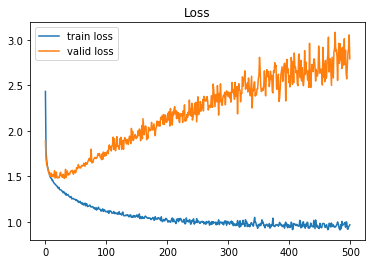

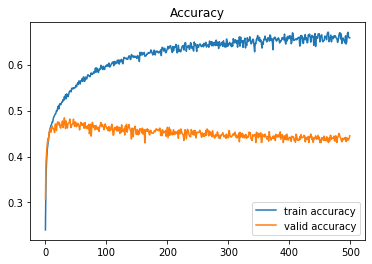

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
"""
Compile 模型
將 Optimizer 換成 SGD
"""
optimizer = optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

NameError: name 'optimizers' is not defined